In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import display

import matplotlib.pylab as pylab

params = {'axes.titlesize': 10,
          'font.size': 12}
pylab.rcParams.update(params)

In [2]:
def best_h(df):
    return df.groupby(['id'], as_index=False).apply(lambda x: x.loc[x['SHD_pattern'].idxmin()])

def best_h_meta(df, metric):
    return df.groupby(['id'], as_index=False).apply(lambda x: x.loc[x[metric].idxmin()])

def worst_h(df):
    return df.groupby(['id'], as_index=False).apply(lambda x: x.loc[x['SHD_pattern'].idxmax()])

def worst_h_meta(df, metric):
    return df.groupby(['id'], as_index=False).apply(lambda x: x.loc[x[metric].idxmax()])

## Load data

In [3]:
df_all = pd.read_csv('./results/sachs/joint_benchmarks.csv', index_col=0)
df_all['id'] = df_all.apply(lambda x: x['id'].upper(), axis=1)

## Sim defaults

In [4]:
defs = []

# from ./results/defaults/
defs.append(df_all.loc[(df_all['id'] == 'ANM') & (df_all['alpha'] == 0.001)])
defs.append(df_all.loc[(df_all['id'] == 'CAM') & (df_all['cutoff'] == 0.001)])
defs.append(df_all.loc[(df_all['id'] == 'FCI') & (df_all['alpha'] == 0.001)])
defs.append(df_all.loc[(df_all['id'] == 'FGES') & (df_all['penaltyDiscount'] == 1.5)])
defs.append(df_all.loc[(df_all['id'] == 'LINGAM') & (df_all['thresh'] == 0.5) & (df_all['max_iter'] == 100)])
defs.append(df_all.loc[(df_all['id'] == 'NOTEARS_MLP') & (df_all['lambda1'] == 0.01) & (df_all['lambda2'] == 0.1) & (df_all['w_threshold'] == 0.5) & (df_all['hidden_units'] == 16)])
defs.append(df_all.loc[(df_all['id'] == 'NOTEARS') & (df_all['lambda1'] == 0.2) & (df_all['w_threshold'] == 0.2) & (df_all['max_iter'] == 100)])
defs.append(df_all.loc[(df_all['id'] == 'PC') & (df_all['alpha'] == 0.002)])

df_hard_defs = pd.concat(defs, axis=0)

df_hard_defs['SHD'] = df_hard_defs['SHD_pattern']
df_hard_defs['FP'] = df_hard_defs['FP_skel']
df_hard_defs['FN'] = df_hard_defs['FN_skel']

## Paper defaults

In [5]:
df_paper_defs = pd.read_csv('./results/sachs_defaults/joint_benchmarks.csv', index_col=0)
df_paper_defs['SHD'] = df_paper_defs['SHD_pattern']
df_paper_defs['FP'] = df_paper_defs['FP_skel']
df_paper_defs['FN'] = df_paper_defs['FN_skel']
df_paper_defs['id'] = df_paper_defs.apply(lambda x: x['id'].upper(), axis=1)

## SHD

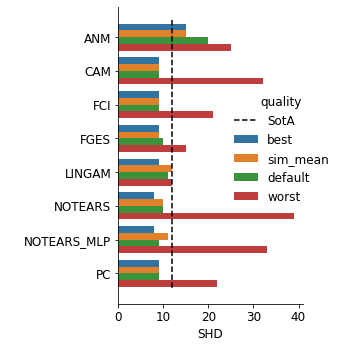

In [6]:
df_best_shd = best_h(df_all)
df_best_shd['SHD'] = df_best_shd['SHD_pattern']

df_worst_shd = worst_h(df_all)
df_worst_shd['SHD'] = df_worst_shd['SHD_pattern']

df_best_shd['quality'] = 'best'
df_hard_defs['quality'] = 'sim_mean'
df_paper_defs['quality'] = 'default'
df_worst_shd['quality'] = 'worst'
df_qual_shd = pd.concat([df_best_shd, df_hard_defs, df_paper_defs, df_worst_shd], axis=0)

sns.catplot(data=df_qual_shd, x='SHD', y='id', hue='quality', kind='bar', orient='h', legend=None).set(ylabel=' ')
plt.vlines(12, ymin=-0.5, ymax=7.5, linestyles='dashed', label='SotA', colors='k')
plt.legend(loc='center right', frameon=False, title='quality', bbox_to_anchor=(1.2, 0.52))

plt.tight_layout()
plt.savefig('./plots/sachs/sachs_quality_hard.pdf', dpi=1000)

## FPs

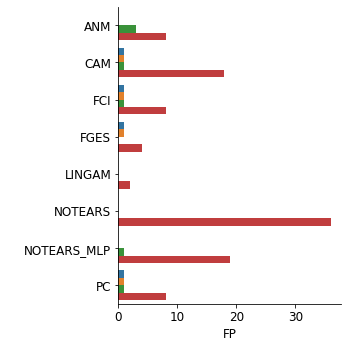

In [7]:
df_best_fp = best_h_meta(df_all, 'FP_skel')
df_best_fp['FP'] = df_best_fp['FP_skel']

df_worst_fp = worst_h_meta(df_all, 'FP_skel')
df_worst_fp['FP'] = df_worst_fp['FP_skel']

df_best_fp['quality'] = 'best'
df_hard_defs['quality'] = 'sim_mean'
df_paper_defs['quality'] = 'default'
df_worst_fp['quality'] = 'worst'
df_qual_fp = pd.concat([df_best_fp, df_hard_defs, df_paper_defs, df_worst_fp], axis=0)

sns.catplot(data=df_qual_fp, x='FP', y='id', hue='quality', kind='bar', orient='h', legend=None).set(ylabel=' ')
#plt.legend(loc='center right', frameon=False, title='quality', bbox_to_anchor=(1.2, 0.52))

plt.tight_layout()
plt.savefig('./plots/sachs/sachs_quality_hard_fp.pdf', dpi=1000)

## FNs

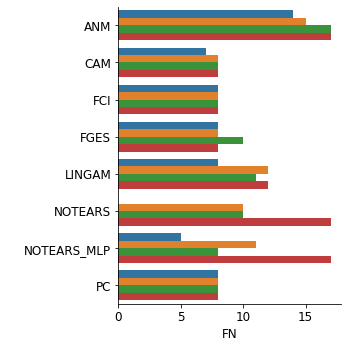

In [8]:
df_best_fn = best_h_meta(df_all, 'FN_skel')
df_best_fn['FN'] = df_best_fn['FN_skel']

df_worst_fn = worst_h_meta(df_all, 'FN_skel')
df_worst_fn['FN'] = df_worst_fn['FN_skel']

df_best_fn['quality'] = 'best'
df_hard_defs['quality'] = 'sim_mean'
df_paper_defs['quality'] = 'default'
df_worst_fn['quality'] = 'worst'
df_qual_fn = pd.concat([df_best_fn, df_hard_defs, df_paper_defs, df_worst_fn], axis=0)

sns.catplot(data=df_qual_fn, x='FN', y='id', hue='quality', kind='bar', orient='h', legend=None).set(ylabel=' ')
#plt.legend(loc='center right', frameon=False, title='quality', bbox_to_anchor=(1.2, 0.52))

plt.tight_layout()
plt.savefig('./plots/sachs/sachs_quality_hard_fn.pdf', dpi=1000)

## All

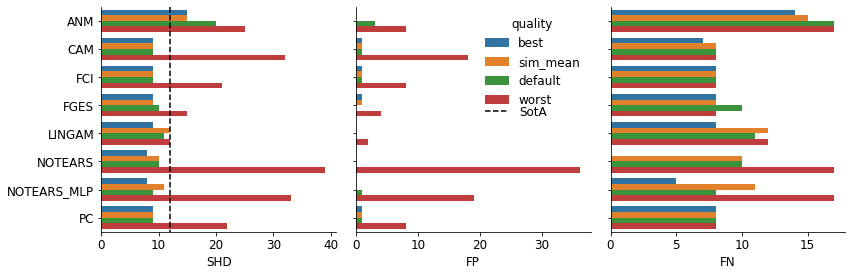

In [23]:
fig, axs = plt.subplots(1, 3, sharex=False, sharey=True, figsize=(12, 4))
axs = axs.flatten()

ax = axs[0]
sns.barplot(data=df_qual_shd, y='id', x='SHD', hue='quality', orient='h', ax=ax)
sota = ax.vlines(12, ymin=-0.5, ymax=7.5, linestyles='dashed', label='SotA', colors='k')
ax.set_ylabel('')
ax.spines[['right', 'top']].set_visible(False)
ax.get_legend().remove()

ax = axs[1]
sns.barplot(data=df_qual_fp, y='id', x='FP', hue='quality', orient='h', ax=ax)
ax.set_ylabel('')
ax.spines[['right', 'top']].set_visible(False)
#ax.get_legend().set_title('')
ax.get_legend().get_frame().set_alpha(0)

ax = axs[2]
sns.barplot(data=df_qual_fn, y='id', x='FN', hue='quality', orient='h', ax=ax)
ax.set_ylabel('')
ax.spines[['right', 'top']].set_visible(False)
ax.get_legend().remove()

fig.legend(loc='lower center', frameon=False, handles=[sota], bbox_to_anchor=(0.604, 0.53))

plt.tight_layout()
plt.savefig('./plots/sachs/sachs_quality_hard_all.pdf', dpi=1000)

## Other stuff

In [ ]:
df_merged = df_best.merge(df_worst, on='id', suffixes=['_best', '_worst'])

display(df_merged[['id', 'SHD_best', 'SHD_worst']])

## Distributions

In [24]:
df = pd.read_csv('./results/sachs/joint_benchmarks.csv', index_col=0)
df['id'] = df.apply(lambda x: x['id'].upper(), axis=1)
algs = df['id'].unique()
algs.sort()

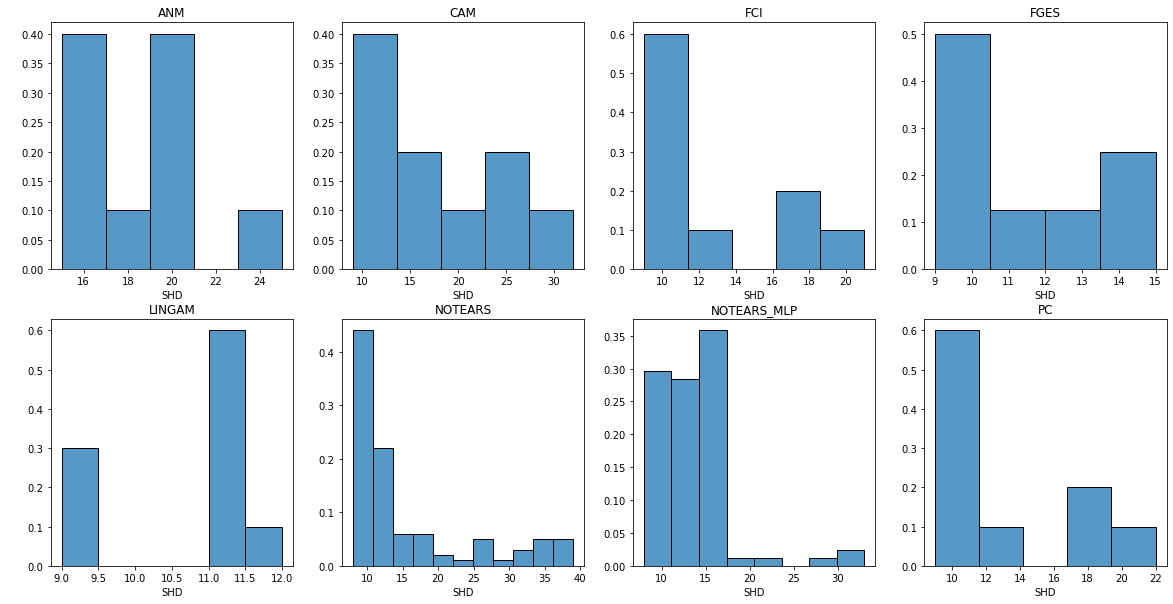

In [18]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()
for ax, alg in zip(axes, algs):
    ax.set_title(alg)
    ax.set_xlabel('SHD')
    ax.set_ylabel(' ')
    sns.histplot(df.loc[df['id'] == alg, 'SHD_pattern'], ax=ax, stat='probability')

<AxesSubplot:xlabel='SHD_pattern', ylabel='id'>

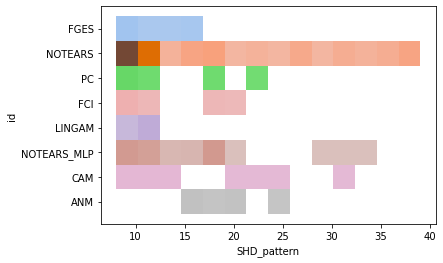

In [22]:
sns.histplot(df, x='SHD_pattern', y='id', hue='id', legend=False)

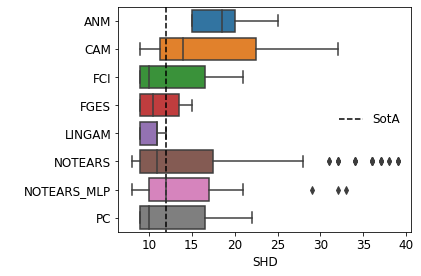

In [25]:
sns.boxplot(data=df, x='SHD_pattern', y='id', order=algs).set(xlabel='SHD', ylabel=' ')

plt.vlines(12, ymin=-0.5, ymax=7.5, linestyles='dashed', label='SotA', colors='k')
plt.legend(loc='center right', frameon=False)

plt.tight_layout()
plt.savefig('./plots/sachs/sachs_h_box.pdf', dpi=1000)

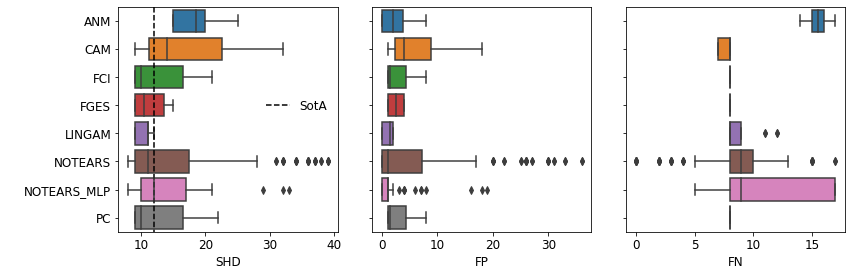

In [33]:
fig, axs = plt.subplots(1, 3, sharex=False, sharey=True, figsize=(12, 4))
axs = axs.flatten()

ax = axs[0]
sns.boxplot(data=df, x='SHD_pattern', y='id', order=algs, ax=ax).set(xlabel='SHD', ylabel=' ')
sota = ax.vlines(12, ymin=-0.5, ymax=7.5, linestyles='dashed', label='SotA', colors='k')

ax = axs[1]
sns.boxplot(data=df, x='FP_skel', y='id', order=algs, ax=ax).set(xlabel='FP', ylabel=' ')

ax = axs[2]
sns.boxplot(data=df, x='FN_skel', y='id', order=algs, ax=ax).set(xlabel='FN', ylabel=' ')

fig.legend(loc='lower center', frameon=False, handles=[sota], bbox_to_anchor=(0.35, 0.55))

plt.tight_layout()
plt.savefig('./plots/sachs/sachs_h_box_all.pdf', dpi=1000)

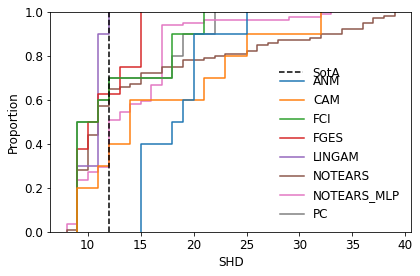

In [12]:
fig, ax = plt.subplots()

g = sns.ecdfplot(data=df, x='SHD_pattern', hue='id', hue_order=algs, legend=True, ax=ax)
g.set(xlabel='SHD')
    
sota = plt.vlines(12, ymin=0, ymax=1, linestyles='dashed', label='SotA', colors='k')

ax.get_legend().set_title('')
ax.get_legend().get_frame().set_alpha(0)

fig.legend(loc='lower center', frameon=False, handles=[sota], bbox_to_anchor=(0.73, 0.665))

plt.tight_layout()
plt.savefig('./plots/sachs/sachs_h_ecdf.pdf', dpi=1000)